In [1]:
import os
import numpy as np
import pandas as pd

#import geopandas as gpd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_path = './data/'
raw = 'raw'
processed = 'processed'
type_of_data = 'bean_prices'
append_in = '_'+type_of_data+'_'+raw+'.csv'
append_out = '_'+type_of_data+'_'+processed+'.csv'

kenya_name = 'kenya'
rwanda_name = 'rwanda'
tanzania_name = 'tanzania'
uganda_name = 'uganda'

#where to load from
kenya_load = os.path.join(data_path, raw, type_of_data, kenya_name+append_in)
rwanda_load = os.path.join(data_path, raw, type_of_data, rwanda_name+append_in)
tanzania_load = os.path.join(data_path, raw, type_of_data, tanzania_name+append_in)
uganda_load = os.path.join(data_path, raw, type_of_data, uganda_name+append_in)

#where to save to
kenya_save = os.path.join(data_path, processed, type_of_data, kenya_name+append_out)
rwanda_save = os.path.join(data_path, processed, type_of_data, rwanda_name+append_out)
tanzania_save = os.path.join(data_path, processed, type_of_data, tanzania_name+append_out)
uganda_save = os.path.join(data_path, processed, type_of_data, uganda_name+append_out)

In [3]:
print(kenya_load)
print(kenya_save)

./data/raw/bean_prices/kenya_bean_prices_raw.csv
./data/processed/bean_prices/kenya_bean_prices_processed.csv


Countries we want to look at:
- Uganda ✔️ (FAO)
- Tanzania ✔️ (FAO)
- Democratic Republic of Congo ✔️ (FAO)
- Rwanda ✔️ (FAO)
- Ethiopia ❌
- Burundi ❌
- Malawi ❌
- Zimbabwe ❌

Countries FAO data has:
- Cameroon
- Democratic Republic of Congo
- Kenya
- Rwanda
- Uganda
- Tanzania

Unfortunately, we can't use Cameroon or the DRC for our analysis. First, Cameroon is the only country of the bunch where we only have prices for `Red Beans`. All the other datasets have data for the more general category `Beans`. This will make it hard to compare the importance factors for across countries when we are actually comparing two different categorical variables. Second, we do not have access to fertilizer prices from Cameroon or the DRC, so these countries will have to be left out.

### Loading price data

In [4]:
#load in data
kenya = pd.read_csv(kenya_load)
rwanda = pd.read_csv(rwanda_load)
tanzania = pd.read_csv(tanzania_load)
uganda = pd.read_csv(uganda_load)

In [5]:
kenya.head()

,Date-Monthly,"Kenya, Wholesale, Mombasa, Beans, USD/kg Commodity Code: 71331","Kenya, Wholesale, Nakuru, Beans, USD/kg Commodity Code: 71331"
0,Jan-06,0.47,NaN
1,Feb-06,0.55,NaN
2,Mar-06,0.62,NaN
3,Apr-06,0.61,NaN
4,May-06,0.55,NaN


So each data frame contains prices for different kinds of beans, but all of them have units $\frac{USD}{kg}$. They also each have a time column `Date-Monthly` that we should turn into a [`DatetimeIndex`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) once we have merged all of the data together.

The column names are quite long, so I am going to replace them with the market names when applicable. There are also NaN values, so I am going to plot the data to see the affect of linearly interpolating it.

In [6]:
kenya.columns = ['Date-Monthly', 'Mombasa', 'Nakuru']
rwanda.columns = ['Date-Monthly', 'Kigali', 'Ruhengeri']
tanzania.columns = ['Date-Monthly', 'Dar es Salaam']
uganda.columns = ['Date-Monthly', 'Lira', 'Kampala']

In [7]:
kenya.head()

,Date-Monthly,Mombasa,Nakuru
0,Jan-06,0.47,NaN
1,Feb-06,0.55,NaN
2,Mar-06,0.62,NaN
3,Apr-06,0.61,NaN
4,May-06,0.55,NaN


In [13]:
def plot_prices(df, name, interp=False, save=False, figname=''):
    """
    Because all of our bean price dataframes have the same units and time index column,
    we can create a function to plot price against time.
    """
    if interp==True:
        df_interp = df.interpolate()
    
    fig, ax = plt.subplots(figsize=(12, 7))
    
    colors = ['tab:blue', 'tab:orange']
    for i, column in enumerate(df.columns[1:]):
        if interp==True:
            df_interp[['Date-Monthly', column]].plot(x='Date-Monthly', color=colors[i], linestyle='--', ax=ax)
        df[['Date-Monthly', column]].plot(x='Date-Monthly', color=colors[i], ax=ax)
    
    ax.set_ylabel('Bean Prices in USD/kg, {}'.format(name.title()))
    plt.legend(loc='upper center', bbox_to_anchor=(1.07, 1.01))
    
    if save==True:
        plt.savefig('./figures/'+figname, format='pdf', bbox_inches='tight')
        
    plt.show()

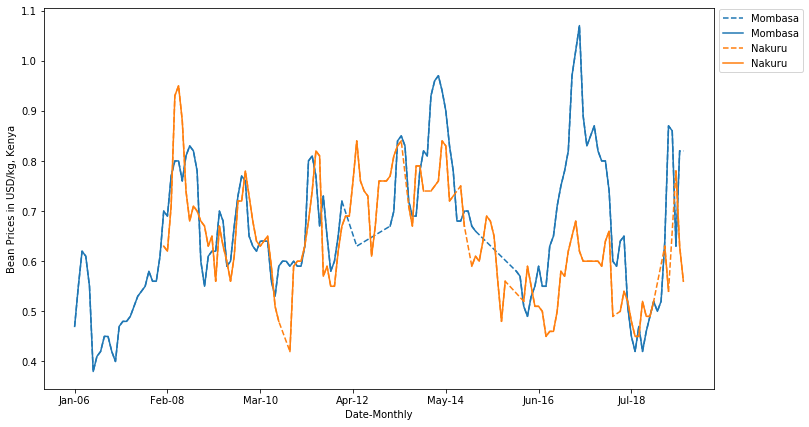

In [14]:
plot_prices(kenya, kenya_name, interp=True, save=False, figname='kenya_bean_prices.pdf')

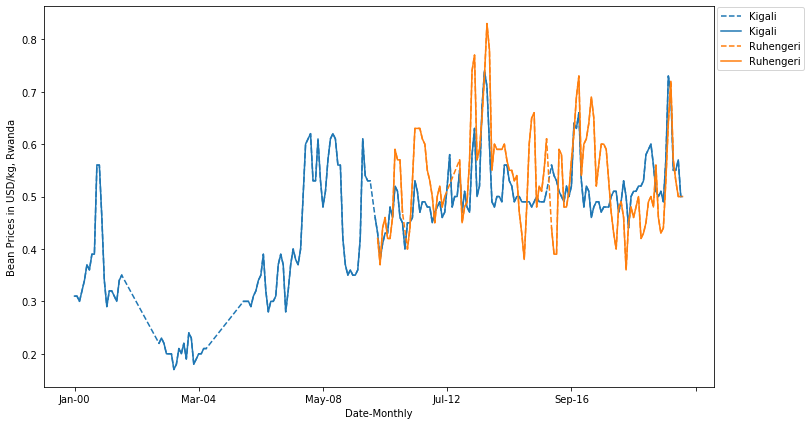

In [15]:
plot_prices(rwanda, rwanda_name, interp=True, save=False, figname='rwanda_bean_prices.pdf')

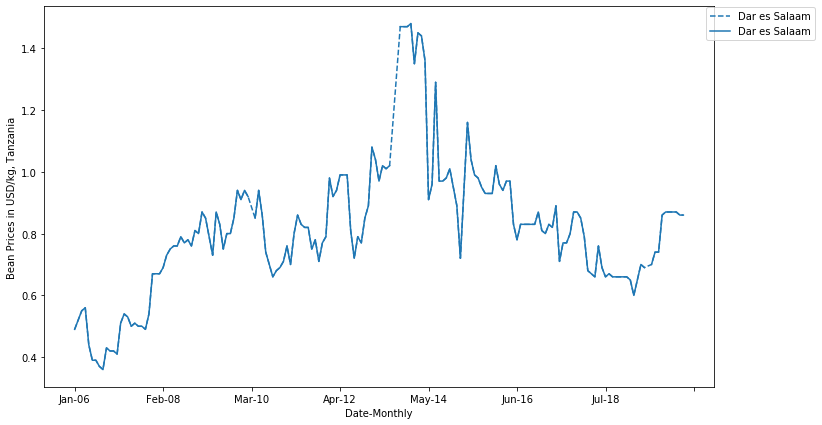

In [16]:
plot_prices(tanzania, tanzania_name, interp=True, save=False, figname='tanzania_bean_prices.pdf')

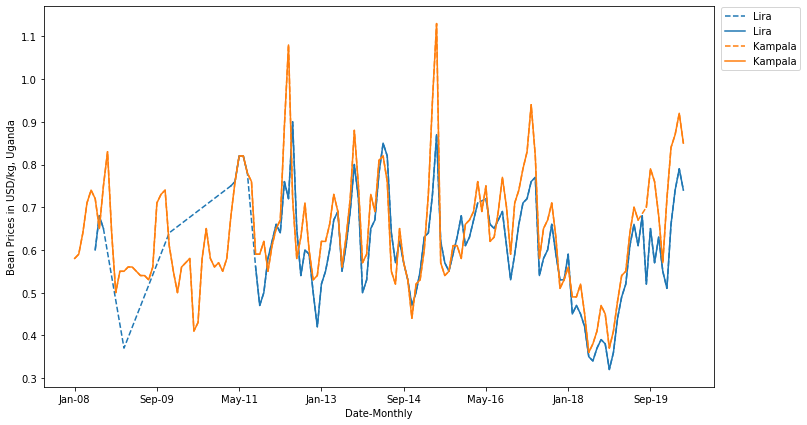

In [17]:
plot_prices(uganda, uganda_name, interp=True, save=False, figname='uganda_bean_prices.pdf')

We only have fertilizer data from 2010-2018, so we will have to limit the data to that timeframe.

It might also be better to pick only one market per country, as some markets in Kenya, Rwanda, and Uganda don't look great after interpolation (and because Tanzania only has one market).

In [18]:
#interpolate data and drop second market, if there is one
kenya = kenya.interpolate().drop('Mombasa', axis=1)
rwanda = rwanda.interpolate().drop('Kigali', axis=1)
tanzania = tanzania.interpolate()
uganda = uganda.interpolate().drop('Lira', axis=1)

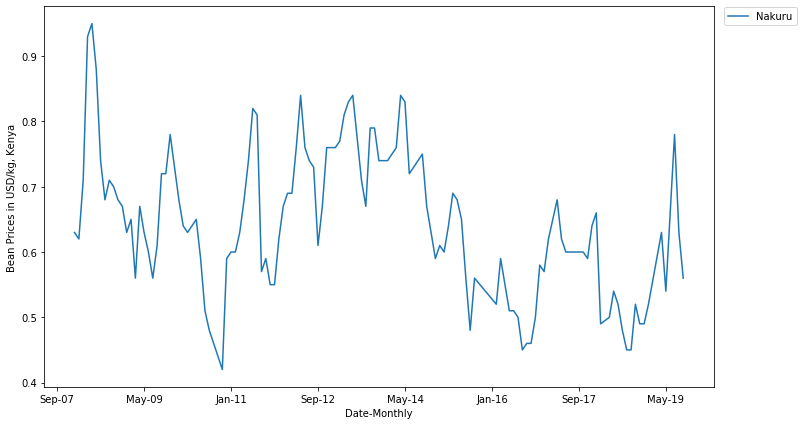

In [19]:
plot_prices(kenya, kenya_name, interp=False, save=False, figname='kenya_bean_prices.pdf')

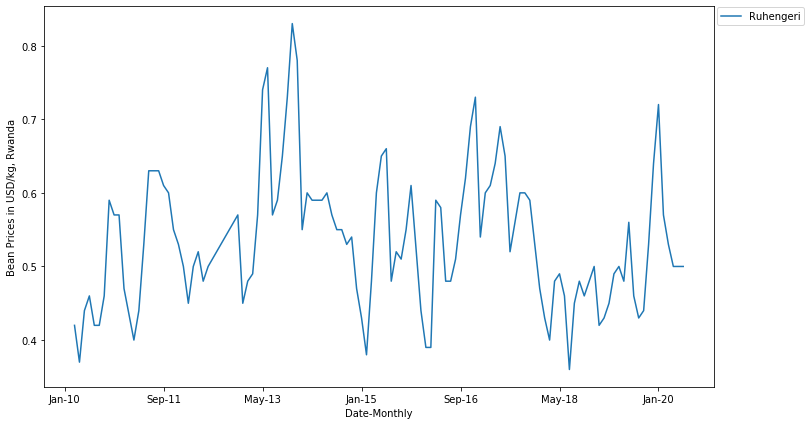

In [20]:
plot_prices(rwanda, rwanda_name, interp=False, save=False, figname='rwanda_bean_prices.pdf')

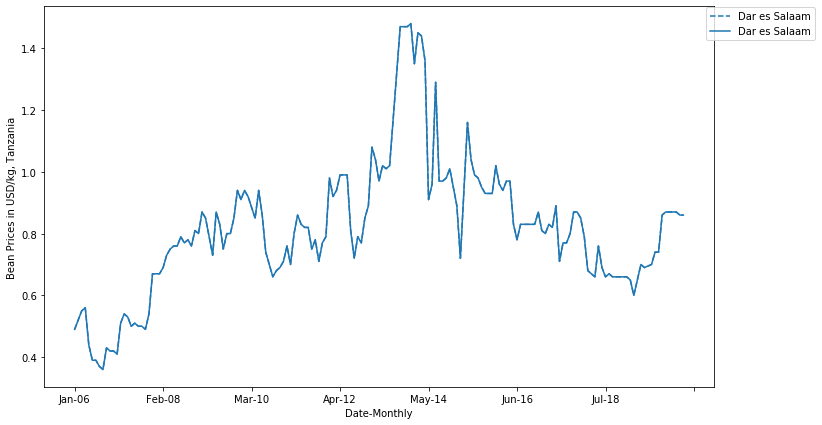

In [21]:
plot_prices(tanzania, tanzania_name, interp=True, save=False, figname='tanzania_bean_prices.pdf')

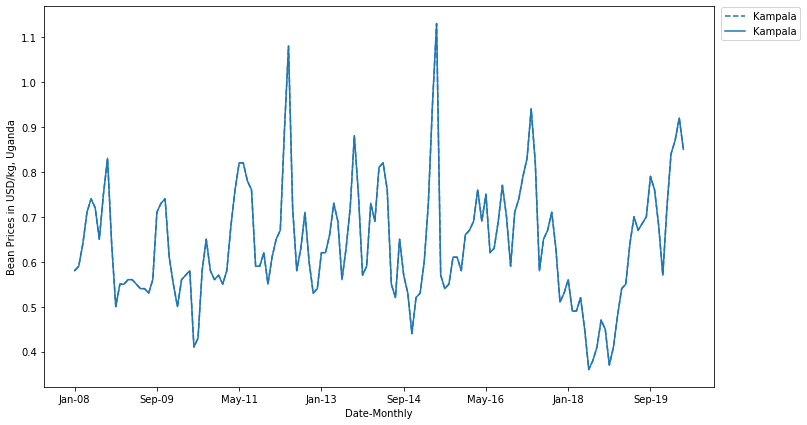

In [22]:
plot_prices(uganda, uganda_name, interp=True, save=True, figname='uganda_bean_prices.pdf')

In [23]:
#now save the data
#kenya.to_csv(kenya_save)
#rwanda.to_csv(rwanda_save)
#tanzania.to_csv(tanzania_save)
#uganda.to_csv(uganda_save)

### Plotting spatial data that we have

In [13]:
gpd.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

In [65]:
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
print("Geometry Column Name : ", countries.geometry.name)
print("Dataset Size : ", countries.shape)
countries.head()

Geometry Column Name :  geometry
Dataset Size :  (177, 6)


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [67]:
cities = gpd.read_file(gpd.datasets.get_path("naturalearth_cities"))
print("Geometry Column Name : ", cities.geometry.name)
print("Dataset Size : ", cities.shape)
cities.head()

Geometry Column Name :  geometry
Dataset Size :  (202, 2)


,name,geometry
0,Vatican City,POINT (12.45339 41.90328)
1,San Marino,POINT (12.44177 43.93610)
2,Vaduz,POINT (9.51667 47.13372)
3,Luxembourg,POINT (6.13000 49.61166)
4,Palikir,POINT (158.14997 6.91664)


In [78]:
#list of cities we have
cities_list = ['Bafoussam', 'Bamenda', 'Garoua', 'Yaundé', 'Bukavu', 'Goma', 'Lubumbashi', 'Mombasa', 'Nakuru', 'Kigali', 'Ruhengeri', 'Dar es Salaam', 'Lira', 'Kampala']
print(len(cities_list))

cities_subset = cities[cities.name.isin(cities_list)]
print(cities_subset.shape)

14
(3, 2)


In [86]:
#look at getting x,y coordinates for all cities above
print(cities_subset)

              name                   geometry
13          Kigali  POINT (30.05859 -1.95164)
48         Kampala   POINT (32.58138 0.31860)
144  Dar es Salaam  POINT (39.26640 -6.79807)


### This visualization should probably be moved to the spatial processing Notebook. Also, see if there is a way to add points to the `cities` and `countries` datasets. For example, find the coordinates of Lira and add it to the `cities` dataframe for easy plotting.

In [15]:
africa = countries[countries.continent=='Africa']
print("Geometry Column Name : ", africa.geometry.name)
print("Dataset Size : ", africa.shape)
africa.head()

Geometry Column Name :  geometry
Dataset Size :  (51, 6)


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
11,83301151,Africa,Dem. Rep. Congo,COD,66010.0,"POLYGON ((29.34000 -4.49998, 29.51999 -5.41998..."
12,7531386,Africa,Somalia,SOM,4719.0,"POLYGON ((41.58513 -1.68325, 40.99300 -0.85829..."
13,47615739,Africa,Kenya,KEN,152700.0,"POLYGON ((39.20222 -4.67677, 37.76690 -3.67712..."


In [37]:
have_data_list = ['Cameroon', 'Dem. Rep. Congo', 'Kenya', 'Rwanda', 'Tanzania', 'Uganda']
need_data_list = ['Ethiopioa', 'Burundi', 'Malawi', 'Zimbabwe']

have_data = africa[africa.name.isin(have_data_list)]
need_data = africa[africa.name.isin(need_data_list)]

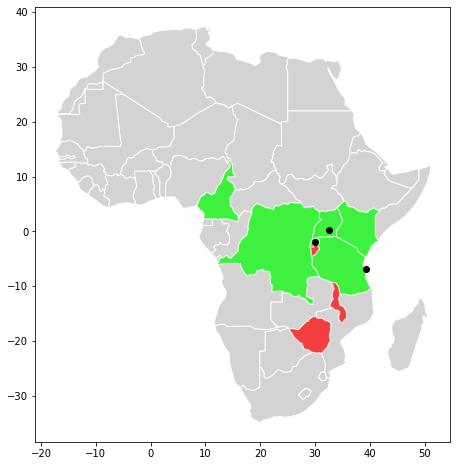

In [89]:
fig, ax = plt.subplots(figsize=(8, 8))

africa.plot(figsize=(8, 8), color='lightgrey', edgecolor='white', ax=ax, label='Not Analyzing')
have_data.plot(color='lime', edgecolor='white', alpha=0.7, ax=ax, label='Have Data')
need_data.plot(color='red', edgecolor='white', alpha=0.7, ax=ax, label='No Data')
cities_subset.plot(color='k', ax=ax)

#ax.legend(bbox_to_anchor=(1, 1)) #currently results in 'No handles with labels found to put in legend.' error
plt.show()

Next steps:
- look at other data source
    - right now, I can't find fertilizer prices at the monthly level, just annual
    - I should look at other data sources for monthly data, but if not start downloading annual data
    - then I could fill the annual data to match the monthly data, because annual data alone results in only ~10-20 data points

**Notes to self:**
- at some point, I will need to merge these data frames or keep them separate and add date to each of them respectively (which could be a pain, but would make the ML portion of this project much easier)
- all dataframes except for Cameroon deal with the broad category of 'beans' (Cameroon seems specific to 'red beans')